<a href="https://colab.research.google.com/github/Qvery-mm/NumericMethods_2/blob/main/lab_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Вычислительный практикум
# Задание №6
### Метод сеток для решения краевой задачи  (метод разностной прогонки).
## Ковальчуков Александр
### 321 группа
### Вариант №6

# Условия задачи

$\frac{x-2}{x + 2} u'' + xu' + (1 - sin x)u = x^2$

$u(-1) = u(1) = 0$

*Первая краевая задача*

$p(x) = - \frac{x-2}{x + 2}$

$q(x) = x$

$r(x) = 1 - \sin{x}$

$f(x) = x^2$

$A_i = \frac{-p_i}{h^2} - \frac{q_i}{2h}$

$B_i = \frac{2p_i}{h^2} + r_i$

$C_i = \frac{-p_i}{h^2} + \frac{q_i}{2h}$

$G_i = f_i$

$S_i = \frac{C_i}{B_i - A_i s_{i-1}}$

$t_i = \frac{A_i t_{i-1} - G_i}{B_i - A_i s_{i-1}}$

$u_0 = 0$

$u_n = 0$

In [11]:
from math import sin
import numpy as np
import pandas as pd
from scipy.integrate import odeint
import matplotlib.pyplot as plt
p = lambda x: -(x-2) / (x + 2)
q = lambda x: x
r = lambda x: 1 - sin(x)
f = lambda x: x**2
a = -1
b = 1
u0 = 0
un = 0

# Метод прогонки

In [12]:
def slide(n):
  h = (b - a) / n
  A = []
  B = []
  C = []
  G = []
  s = []
  t = []

  for i in range(n + 1):
    x = a + i * h
    
    if i == 0:
      A_i = 0
      B_i = 1
      G_i = 0
      C_i = 0
      s_i = 0
      t_i = 0
      
    elif i == n:
      A_i = 0
      B_i = 1
      C_i = 0
      G_i = 0
      s_i = 0
      t_i = un
    else:
      A_i = -p(x) / h**2 - q(x) / (2*h)
      B_i = -(2 * p(x) / h**2 + r(x))
      C_i = -p(x) / h**2 + q(x) / (2 * h)
      G_i = f(x) 
      s_i = C_i / (B_i - A_i * s[-1])
      t_i = (A_i * t[-1] - G_i) / (B_i - A_i * s[-1])
    A.append(A_i)
    B.append(B_i)
    C.append(C_i)
    G.append(G_i)
    s.append(s_i)
    t.append(t_i)
  
  u = []
  u.append(un)
  for i in range(n):
    j = n - i - 1
    u_j = s[j] * u[-1] + t[j]
    u.append(u_j)

  u = u[::-1]
  return u


In [13]:
def plot(u, title):
  x_plot = np.linspace(a, b, len(u))
  x_plot
  plt.plot(x_plot, u, label='u')
  plt.legend()
  plt.xlabel("x")
  plt.ylabel("y")
  plt.title(title)
  plt.show()


# Решение встроенными методами

In [14]:

def fun(x, y):
    return np.vstack(( y[1], (x + 2) / (x - 2) * (-x * y[0] - (1 - np.sin(x)) * y[1] + x*x) ))

def bc(ya, yb):
    return np.array([ya[0], yb[0]])

x = np.linspace(a, b, 11)

y_a = np.ones((2, x.size))

from scipy.integrate import solve_bvp
res_a = solve_bvp(fun, bc, x, y_a)

In [15]:
x_plot = np.linspace(a, b, 11)
y_plot = res_a.sol(x_plot)[0]


# Уточнение по Ричардсону

In [16]:
u10 = slide(10)
u20 = slide(20)
R_m = np.array(u20[::2]) - np.array(u10) / (2**1 - 1)
u_rev = np.array(u20[::2]) - R_m

y_plot - u_rev

array([ 0.00000000e+00, -3.17819645e-03, -2.72265008e-03, -1.00517108e-03,
        3.62504123e-04,  6.43162060e-04, -3.02911417e-04, -2.57927248e-03,
       -6.55084605e-03, -1.08727934e-02, -4.33680869e-18])

In [17]:
pd.DataFrame({"Точное": y_plot, "Прогонка n=10": u10, "Прогонка n=20": u20[::2], "Уточнение": u_rev})

,Точное,Прогонка n=10,Прогонка n=20,Уточнение
0,0.000000e+00,0.000000,0.000000,0.000000
1,2.595698e-02,0.029135,0.029709,0.029135
2,4.383767e-02,0.046560,0.047755,0.046560
3,5.589840e-02,0.056904,0.058745,0.056904
4,6.496975e-02,0.064607,0.067104,0.064607
5,7.391169e-02,0.073269,0.076410,0.073269
6,8.455764e-02,0.084861,0.088596,0.084861
7,9.585749e-02,0.098437,0.102622,0.098437
8,1.008189e-01,0.107370,0.111634,0.107370
9,8.148175e-02,0.092355,0.095747,0.092355


# Красивые графики

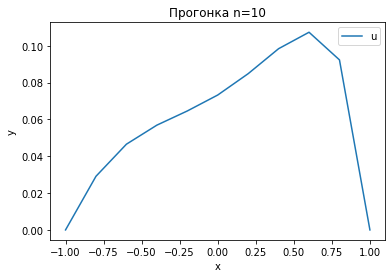

In [18]:
plot(u10, "Прогонка n=10")

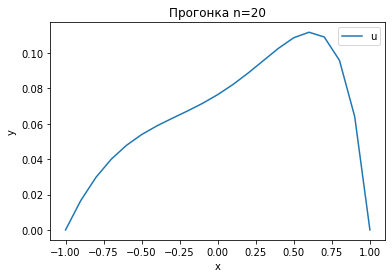

In [19]:
plot(u20, "Прогонка n=20")

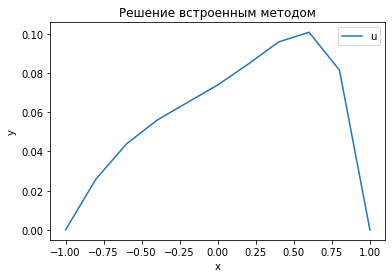

In [20]:
plot(y_plot,  "Решение встроенным методом")